In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [22]:
train_data = pd.read_pickle('Data/train_data.pkl')
train_labels = pd.read_pickle('Data/train_labels.pkl')
train_data.shape, train_labels.shape

((5531451, 189), (458913, 1))

In [57]:
features = ['B_1', 'B_37']
train_data[features]

,B_1,B_37
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.008728,0.004570
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.004925,0.004654
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.021652,0.019180
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.013687,0.011719
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.015190,0.017593
...,...,...
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681,0.020813,0.022903
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681,0.007210,0.013443
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681,0.013153,0.009064


In [58]:
train_data[features].describe()

,B_1,B_37
count,5.531451e+06,5.531395e+06
mean,NaN,NaN
std,0.000000e+00,0.000000e+00
min,-7.589844e+00,-7.605469e+00
25%,8.865356e-03,8.834839e-03
50%,3.134155e-02,3.114319e-02
75%,1.258545e-01,1.238403e-01
max,1.324219e+00,1.328125e+00


array([[<AxesSubplot:title={'center':'B_1'}>,
        <AxesSubplot:title={'center':'B_37'}>]], dtype=object)

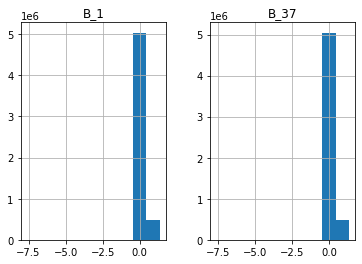

In [59]:
train_data[features].hist()

array([[<AxesSubplot:title={'center':'B_1'}>,
        <AxesSubplot:title={'center':'B_37'}>]], dtype=object)

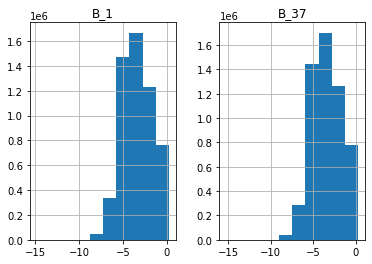

In [60]:
pd.DataFrame(np.log(train_data[features]+0.0001)).hist()

In [61]:
train_data[features].isnull().sum()

B_1      0
B_37    56
dtype: int64

In [47]:
df_study = train_data[features].fillna(-1)
df_study['diff'] = df_study.iloc[:,0].sub(df_study.iloc[:,1])
df_study.sort_values(by = 'diff', ascending = False, inplace=True)
df_study

,B_1,B_11,diff
customer_ID,,,
1934dee55d4b57dca16390e504c732f5ce887ab0be165d064412c5140a6ee350,0.845703,0.734863,0.110840
5ec79f6c50aee9f3cda624cfec130ede4a6e3e907f2d3694814289121290d576,0.950684,0.840332,0.110352
fdcefd55130b3aa2eda453fb78fb6715c88221a39e8c5a10f3891d21b0cff16f,0.856934,0.746582,0.110352
3dd50541c243672d6d714edf07cf3331354ee09d9d9e01ae01435714d3792f29,0.874023,0.763672,0.110352
353078c7375e33a4aed474403c99e941182c751aea211dc950a639896f5e6113,0.859863,0.749512,0.110352
...,...,...,...
2051d0cd445858284ebccd4163697cb1ebf367ac643b5971d195833a5d9bf9d7,-1.536133,0.004517,-1.541016
e641fb6132dde6b07cbacc4b9c14bfea2b22e4c20e9cedc56d1117bf968a64cd,-1.808594,0.009407,-1.818359
5ad7d25a4951eab874c50198e6a1ddd83c75249dffd4b08a78d1ae1c9f666ac8,-1.833008,0.001227,-1.833984


In [51]:
df_study[df_study['diff'] > 0.05]

,B_1,B_11,diff
customer_ID,,,
1934dee55d4b57dca16390e504c732f5ce887ab0be165d064412c5140a6ee350,0.845703,0.734863,0.110840
5ec79f6c50aee9f3cda624cfec130ede4a6e3e907f2d3694814289121290d576,0.950684,0.840332,0.110352
fdcefd55130b3aa2eda453fb78fb6715c88221a39e8c5a10f3891d21b0cff16f,0.856934,0.746582,0.110352
3dd50541c243672d6d714edf07cf3331354ee09d9d9e01ae01435714d3792f29,0.874023,0.763672,0.110352
353078c7375e33a4aed474403c99e941182c751aea211dc950a639896f5e6113,0.859863,0.749512,0.110352
...,...,...,...
fc0ce3518e62fdc90fb1ea28b236774259a0d306bf88dec2f9ba47101daf273b,0.470459,0.420410,0.050049
d6f826265d69901975d9c7e9970bb291a917fc2e842df4c721f7314bb0d49bfe,0.275391,0.225342,0.050049
94b0054b8f6464d1be4cc64f201619db56e3bf1075ad411b09f70de9b50ec586,0.358398,0.308350,0.050049


In [48]:
indx = df_study[df_study['diff'] > 0.5].index.unique()
# train_labels.loc[indx].hist()
indx

Index([], dtype='object', name='customer_ID')